<a href="https://www.kaggle.com/code/kaushiksuresh147/doge-coin-to-moon-eda-and-prediction?scriptVersionId=94914896" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div>
    <h1><center style="background-color:#6A5ACD; color:white;"> Dogecoin Historical Data Analysis</center></h1>
</div>


<div style="text-align:center">
<img src="https://i.pinimg.com/originals/d6/7e/a9/d67ea9ed1d1a8bb3fd69dad57e11e23c.gif" width='500'>
</div>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background-color:#6A5ACD; border:0' role="tab" aria-controls="home" color=black><center>Quick navigation</center></h3>

* [1. Required Libraries](#1)
* [2. Dataset Quick Overview](#2)
* [3. Distribution of Features](#3)
* [4. Correlation Analysis ](#4)   
* [5. Candle stick chart on Dogecoin historical data](#5)
* [6. Time series analysis and prediction using prophet](#6)
* [7. References](#7)
* [8. Related works](#8)
* [9. Some interesting factors, which led to recent rise in dogecoin](#9)



<div class="alert alert-info">
<p><center><b>Dogecoin is a cryptocurrency invented by software engineers Billy Markus and Jackson Palmer, who decided to create a payment system that is instant, fun, and free from traditional banking fees.</b> <center><p>

- Circulating supply: 127 billion (113 billion coins have already been mined)
- Original author(s): Billy Markus, Jackson Palmer
- Initial release: December 6, 2013; 7 years ago

<p>Here’s a list of few interesting facts about Dogecoin:

<p>1. Dogecoin started as a joke created by Jackson Palmer and Billy Marcus in November 2013. Marcus recently claimed that he sold all of his DOGE in 2015.</p>
<p>2. There are 128,264,356,384 DOGE coins in circulation at this moment, compared to 18.5 million bitcoins.</p>
<p>3. Dogecoin hosts one of the largest communities in the crypto space.</p>
<p>4. In 2014, the Dogecoin community raised $55,000 to sponsor NASCAR driver Josh Wise and covered his car entirely in Dogecoin and Reddit alien images.</p>
</div>

<a id="1"></a>
<h2 style='background-color:#6A5ACD; border:0; color:black'><center>Required Libraries</center><h2>

In [1]:

#Data Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.BLACK

#NetworkX
import networkx as nx
import plotly.graph_objects as go #To construct network graphs

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis pacakages:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Facebook Prophet packages:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric


#Importing of Data 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data=pd.read_csv('../input/dogecoin-historical-data/DOGE-USD.csv')



/kaggle/input/dogecoin-historical-data/DOGE-USD.csv


<a id="2"></a>
<h2 style='background-color:#6A5ACD; border:0; color:black'><center>Data set Overview</center><h2>

In [2]:
print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(1532, 6)

Data types of data columns: 
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [3]:
# Coverting the date column to a datetime format and sorting the dataframe by date
data['Date'] =  pd.to_datetime(data['Date'],infer_datetime_format=True,format='%y-%m-%d')
data.sort_values(by='Date',inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270


In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume
1527,2022-01-14,0.172053,0.203232,0.171283,0.183549,5784004926
1528,2022-01-15,0.183644,0.193600,0.182676,0.185103,1878282290
1529,2022-01-16,0.185093,0.185093,0.175327,0.177176,1102750171
1530,2022-01-17,0.177187,0.177872,0.166891,0.171145,1094379303
1531,2022-01-18,0.171080,0.173651,0.165412,0.166144,1150345216


<div class="alert alert-info">
    <h3><b><center>Missing values</center><b></h3>
</div>


<div class="alert alert-info">
    <h3><b>Let's drop the records with NA value, to make sure it doesnt cloud our analysis<b></h3>
</div>


In [5]:
prev_len=data.shape[0]
print(f"{m_}Total records: {y_}{data.shape[0]}\n")
print(f"{m_}Total records with missing values: {y_}{data.isna().sum().sum()}\n")
data=data.dropna()
print(f"{m_}Total records after the removal of NA values: {y_}{data.shape[0]}\n")
print(f"{m_}Removed records:{y_}{prev_len-data.shape[0]}\n")
print(f"{m_}Removed records percentage:{y_}{round(((prev_len-data.shape[0])/prev_len)*100,2)}")

Total records: 1532

Total records with missing values: 0

Total records after the removal of NA values: 1532

Removed records:0

Removed records percentage:0.0


<a id="3"></a>
<h2 style='background-color:#6A5ACD; border:0; color:black'><center>Distribution of Features</center><h2>

<div class="alert alert-info">
    <h3><b>Let's Visualize the distribution of the key variables like Opening price, Highest price, Lowest price and Closing price in Dogecoin<b></h3>
</div>


In [6]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

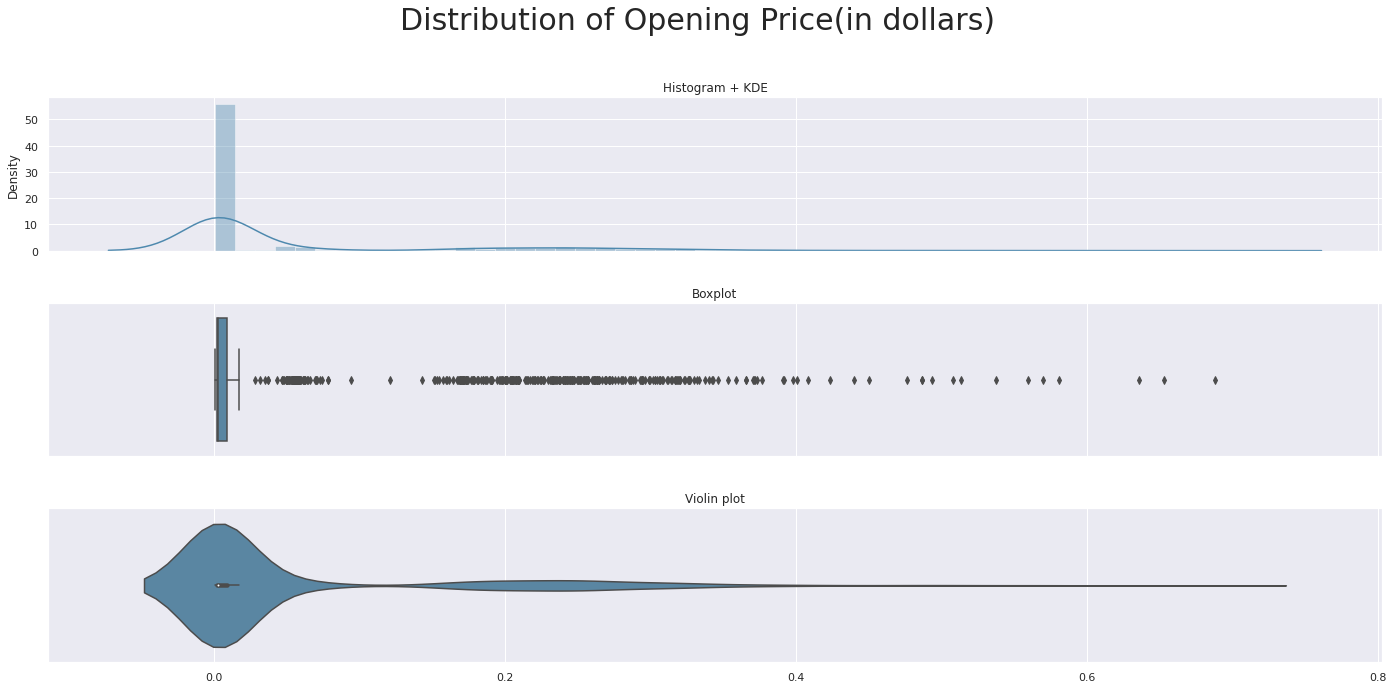

In [7]:
triple_plot(data['Open'],'Distribution of Opening Price(in dollars)',custom_colors[0])

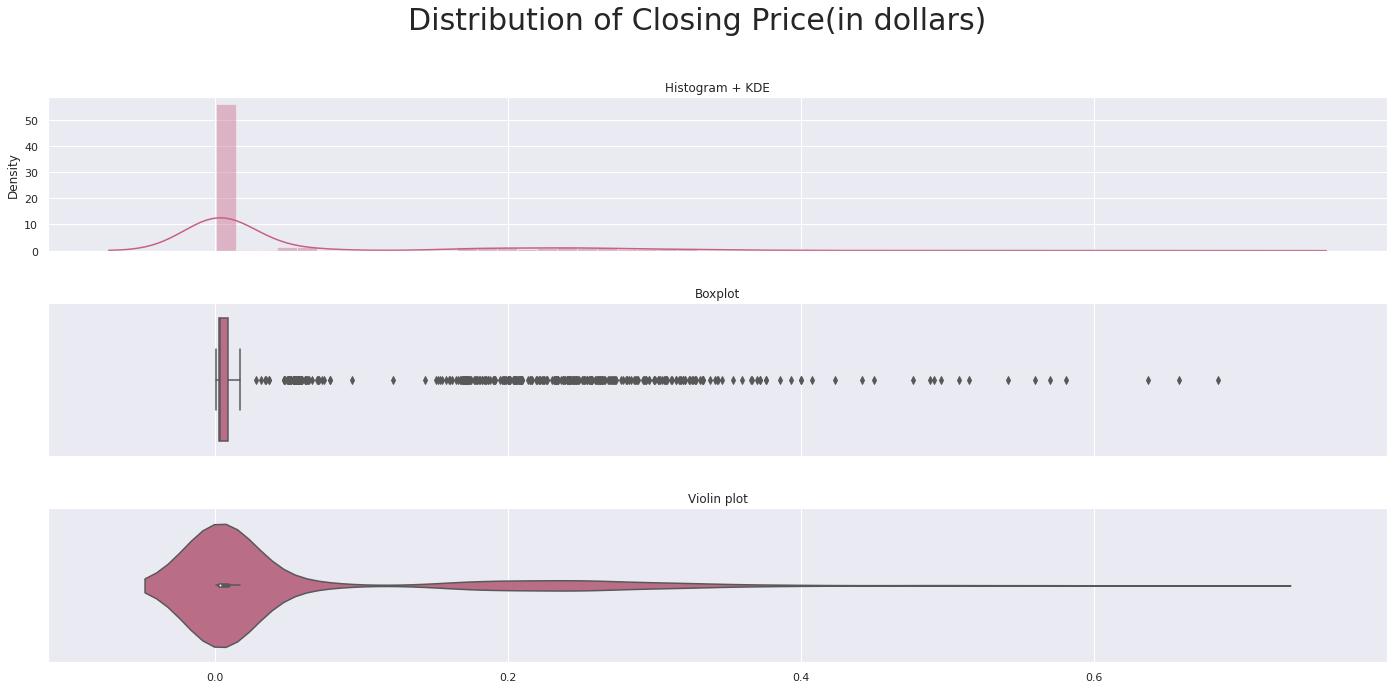

In [8]:
triple_plot(data['Close'],'Distribution of Closing Price(in dollars)',custom_colors[1])

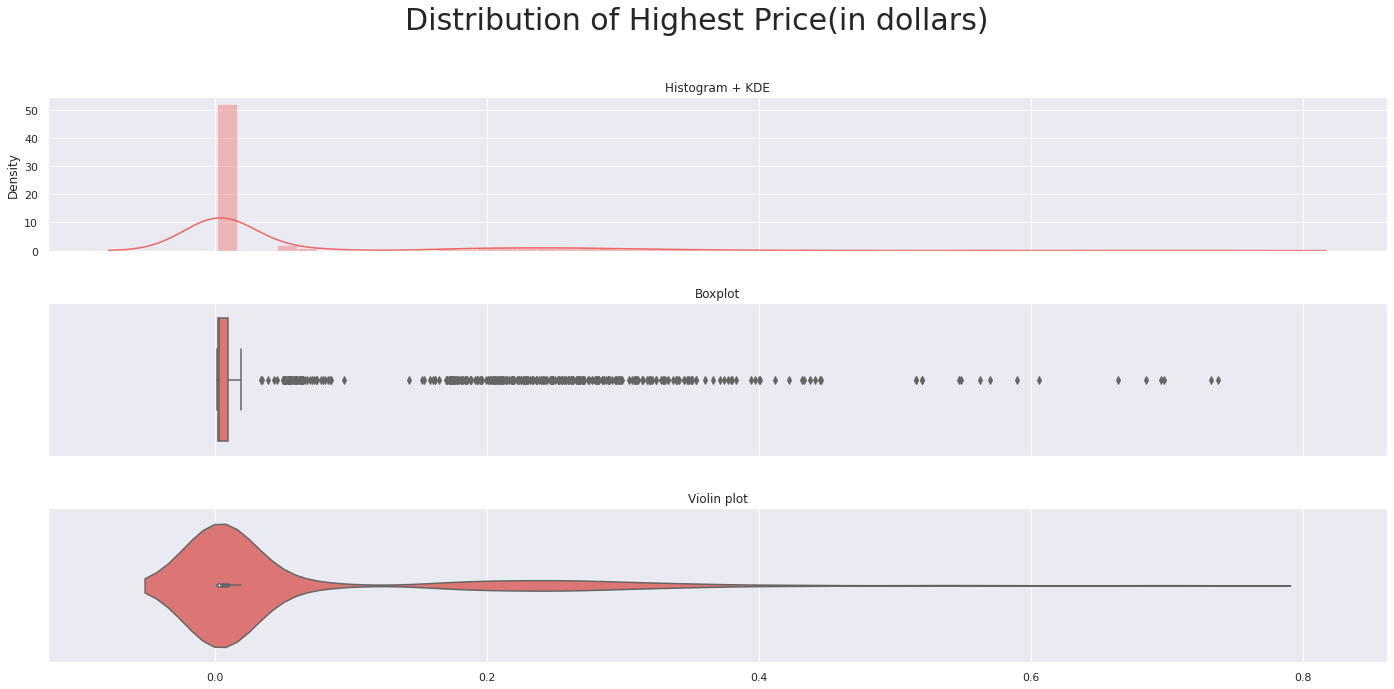

In [9]:
triple_plot(data['High'],'Distribution of Highest Price(in dollars)',custom_colors[2])

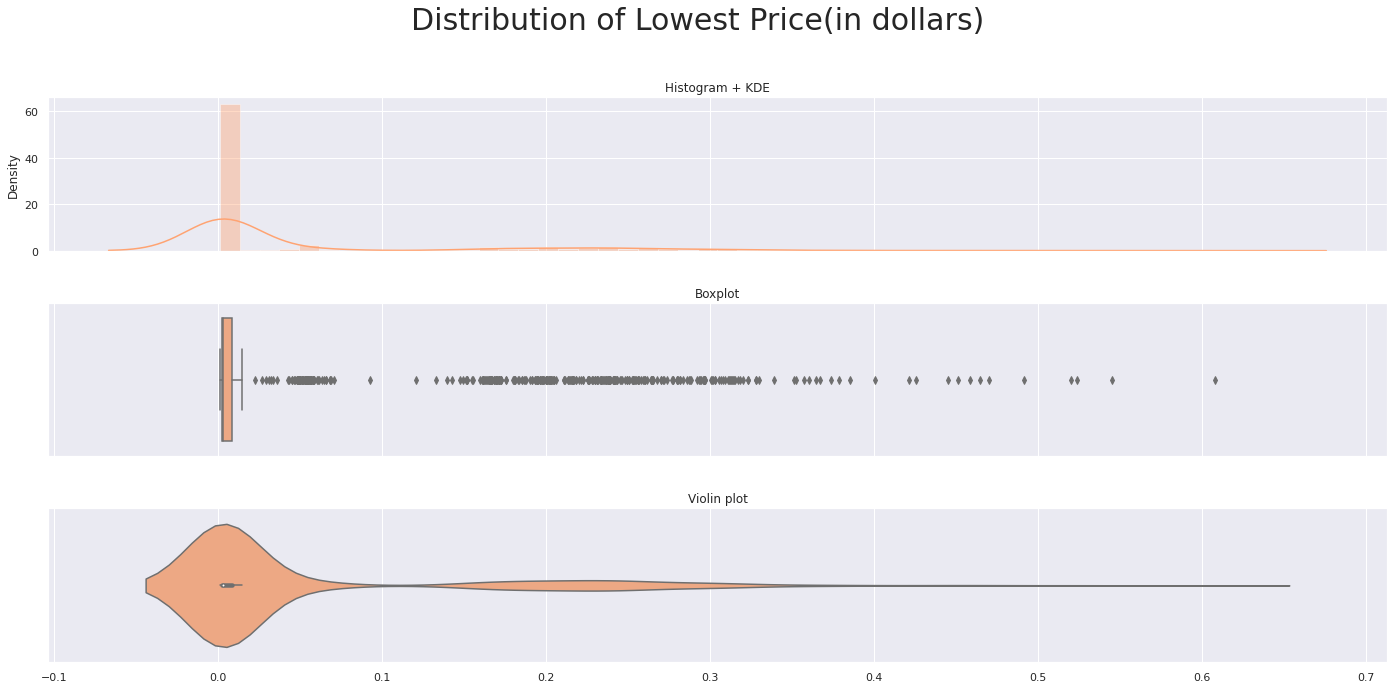

In [10]:
triple_plot(data['Low'],'Distribution of Lowest Price(in dollars)',custom_colors[3])

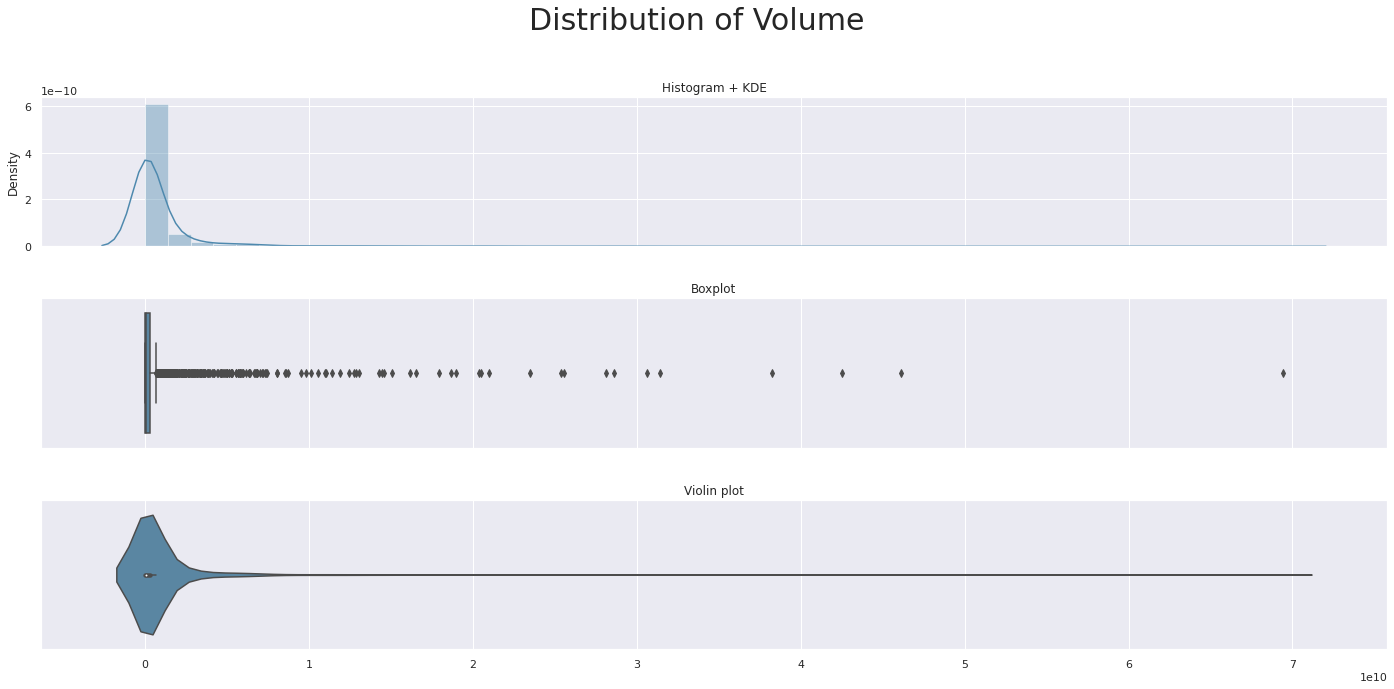

In [11]:
triple_plot(data['Volume'],'Distribution of Volume',custom_colors[0])

<a id="4"></a>
<h2 style='background-color:#6A5ACD; border:0; color:black'><center>Correlation Analysis</center><h2>

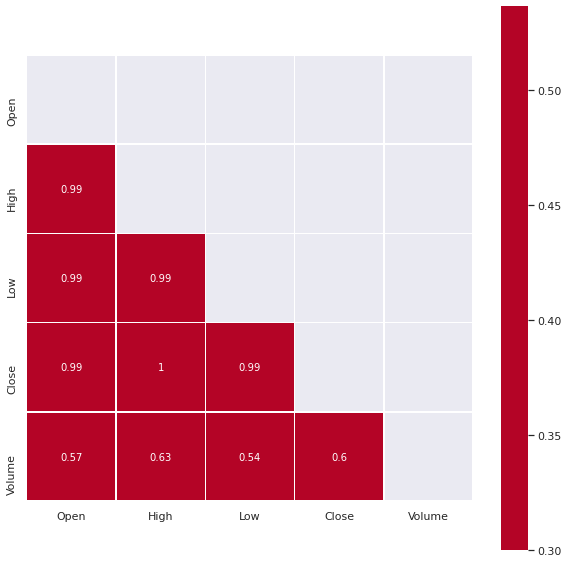

In [12]:
plt.figure(figsize=(10,10))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

<div class="alert alert-info">
    <h3><b><center>Correlation Network</center><b></h3>
</div>


In [13]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
#G.edges(data=True)

In [14]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**4 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=13)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

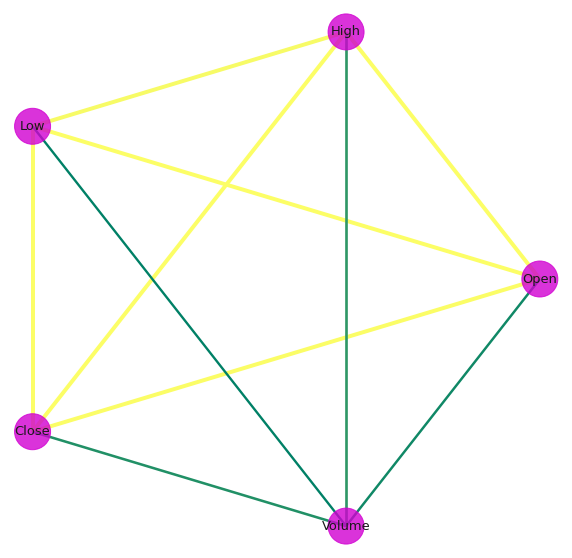

In [15]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)


<a id="5"></a>
<h2 style='background-color:#6A5ACD; border:0; color:black'><center>Candle stick chart on the price movements of the Dogecoin</center><h2>


<div style="text-align:center">
    <img src="https://www.tradingwithrayner.com/wp-content/uploads/2018/05/1-OHLC-COMBINE.png">
</div>

In [16]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])
                      ])
fig.show()

In [17]:
data['month']=data['Date'].dt.month
fig = go.Figure(data=[go.Candlestick(x=data['month'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])
                      ])
fig.show()

<a id="6"></a>
<h2 style='background-color:#6A5ACD; border:0; color:black'><center>Time series Analysis and Prediction using Prophet</center><h2>



<div style="text-align:center">
<img src="https://insightimi.files.wordpress.com/2020/07/on-de793_201909_g_20190830121038.gif" width='500' height='500'>
    </div>

<div class="alert alert-warning">
    <h1><b><center>What is Prophet?</center><b></h1>
    <h3>Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.</h3>
</div>




<div class='alert alert-warning'>
    <h2><b><center>Advantages of using Prophet</center><b></h2>
        <h3> 1. Accommodates seasonality with multiple periods</h3>
        <h3> 2. Prophet is resilient to missing values</h3>
        <h3> 3. Best way to handle outliers in Prophet is to remove them</h3>
        <h3> 4. Fitting of the model is fast</h3>
    <h3> 5. Intuitive hyper parameters which are easy to tune</h3>
</div>

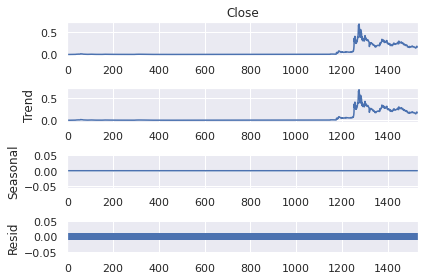

<Figure size 1080x864 with 0 Axes>

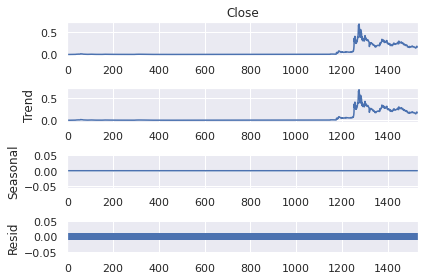

In [18]:
plt.figure(figsize=(15,12))
series = data.Close
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

<div class='alert alert-warning'>
    <h3><center>Input to Prophet is a data frame with minimum two columns : ds and y</center></h3>
</div>

In [19]:
# Renaming the column names accroding to Prophet's requirements
prophet_df=data[['Date','Close']]
prophet_df.rename(columns={'Date':'ds','Close':'y'},inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<div class='alert alert-warning'>
    <h2><center>Creating and fitting the Prophet model with default values</center></h2>
    <h3>We will first explore the default Prophet model. Create the Prophet instance with all default values, fit the dataset.</h3>
</div>

In [20]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

<div class='alert alert-warning'>
    <h2><center>Predicting the values for the future</center></h2>
<h4>For predicting the values using Prophet, we need to create a dataframe with ds(datetime stamp) containing the dates for which we want to make the predictions.<br><br>
We use make_future_dataframe() to which we specify the number of days to extend into the future. By default it includes dates from the history</h4>
</div>

In [21]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

,ds
1830,2022-11-13
1831,2022-11-14


In [22]:
forecast=prophet_basic.predict(future)

<div class='alert alert-warning'>
    <h3><center>Plotting the predicted data</center></h3>
</div>

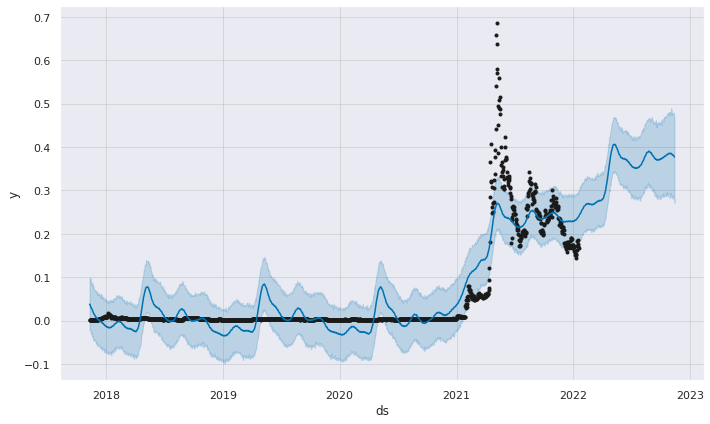

In [23]:
fig1 =prophet_basic.plot(forecast)

<div class='alert alert-warning'>
    <h3><center>Plotting the Forecasted components(Trend and Seasonality)</center></h3>
</div>

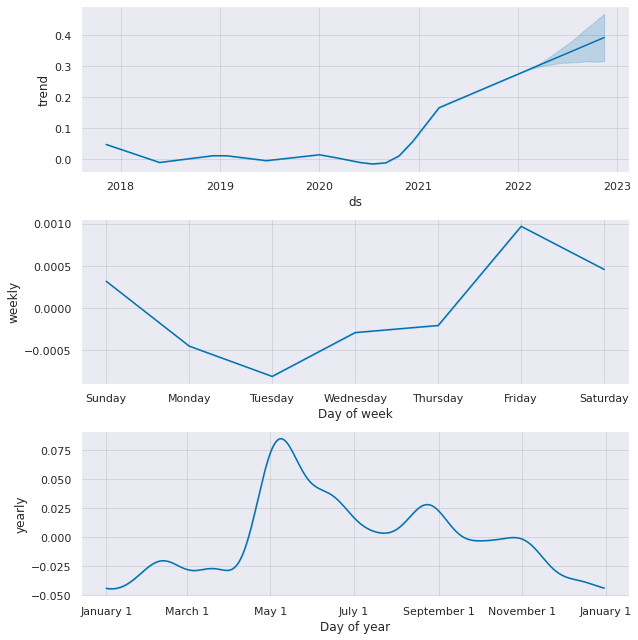

In [24]:
fig1 = prophet_basic.plot_components(forecast)

<div class='alert alert-warning'>
    <h3><center>Adding ChangePoints to Prophet</center></h3>
<h4>Changepoints are the datetime points where the time series have abrupt changes in the trajectory.<br>
By default, Prophet adds 25 changepoints to the initial 80% of the data-set.<br>
    <br><center>Let’s plot the vertical lines where the potential changepoints occurred</center><h4>
    </div>

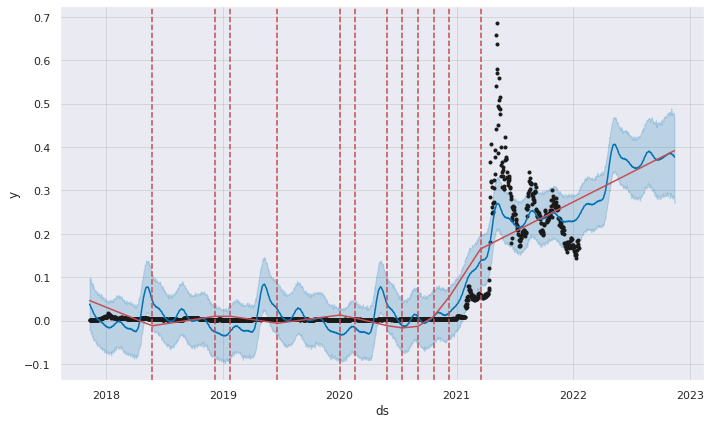

In [25]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

<div class='alert alert-warning'>
        <h3> Following are the Changepoints, where the time series had abrupt changes in the trajectory.</h3>
</div>

In [26]:
print(f'{m_}Change points:\n {y_}{prophet_basic.changepoints}\n')

Change points:
 49     2017-12-28
98     2018-02-15
147    2018-04-05
196    2018-05-24
245    2018-07-12
294    2018-08-30
343    2018-10-18
392    2018-12-06
441    2019-01-24
490    2019-03-14
539    2019-05-02
588    2019-06-20
636    2019-08-07
685    2019-09-25
734    2019-11-13
783    2020-01-01
832    2020-02-19
881    2020-04-08
930    2020-05-27
979    2020-07-15
1028   2020-09-02
1077   2020-10-21
1126   2020-12-09
1175   2021-01-27
1224   2021-03-17
Name: ds, dtype: datetime64[ns]



<div class='alert alert-warning'>
    <h2><center>Adding Multiple Regressors</center></h2>
<h3>Additional regressors can be added to the Prophet model. This is done by using add_regressor. Additional regressor column value needs to be present in both the fitting as well as prediction dataframes.<h3>
    <h3><center>Creating fitting and predicting dataset with additional regressors</center></h3>
    </div>

In [27]:
prophet_df['Open'] = data['Open']
prophet_df['High'] = data['High']
prophet_df['Low'] = data['Low']
prophet_df['Vol'] = data['Volume']

prophet_df=prophet_df.dropna()
train_X= prophet_df[:1500]
test_X= prophet_df[1500:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [28]:
pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Vol')



In [29]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)

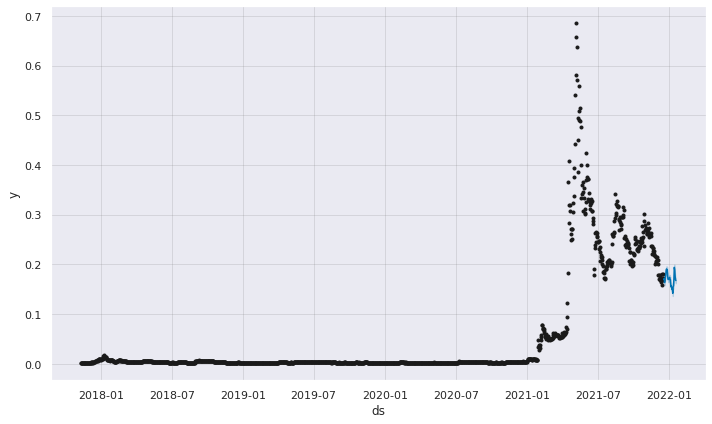

In [30]:
#Forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

In [31]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,High,High_lower,High_upper,Low,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
27,2022-01-14,0.048199,0.187994,0.200107,0.048196,0.048202,0.083982,0.083982,0.083982,0.109332,...,0.000395,0.000395,0.000395,0.000187,0.000187,0.000187,0.0,0.0,0.0,0.194038
28,2022-01-15,0.048193,0.183772,0.195196,0.048189,0.048197,0.078561,0.078561,0.078561,0.119364,...,-0.000052,-0.000052,-0.000052,0.000137,0.000137,0.000137,0.0,0.0,0.0,0.189761
29,2022-01-16,0.048187,0.171686,0.183729,0.048183,0.048191,0.073773,0.073773,0.073773,0.112893,...,0.000581,0.000581,0.000581,0.000081,0.000081,0.000081,0.0,0.0,0.0,0.177774
30,2022-01-17,0.048181,0.163563,0.174781,0.048177,0.048185,0.069708,0.069708,0.069708,0.105465,...,-0.000156,-0.000156,-0.000156,0.000019,0.000019,0.000019,0.0,0.0,0.0,0.168864
31,2022-01-18,0.048175,0.161639,0.173173,0.048171,0.048180,0.067332,0.067332,0.067332,0.104163,...,-0.000310,-0.000310,-0.000310,-0.000048,-0.000048,-0.000048,0.0,0.0,0.0,0.167631


<div class='alert alert-warning'>
<h3><center>6 different types of metrics are shown by each time horizon, but by taking moving average over 37 days in this case (can be changed by ‘rolling_window’ option).</center></h3>
</div>

  0%|          | 0/6 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,9.727225e-08,0.000312,0.000185,0.058602,0.026744,0.687215
1,38 days,9.863822e-08,0.000314,0.000187,0.059816,0.027161,0.682648
2,39 days,9.921172e-08,0.000315,0.000189,0.060552,0.026744,0.684932
3,40 days,9.996809e-08,0.000316,0.000190,0.061297,0.026744,0.680365
4,41 days,1.005983e-07,0.000317,0.000191,0.061859,0.025736,0.678082


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,0.000120,0.010939,0.004162,0.315482,0.045251,0.333333
325,362 days,0.000116,0.010748,0.004104,0.315163,0.045251,0.333333
326,363 days,0.000108,0.010392,0.003975,0.314970,0.045756,0.328767
327,364 days,0.000104,0.010211,0.003837,0.314386,0.045756,0.328767
328,365 days,0.000104,0.010221,0.003859,0.314030,0.047988,0.328767


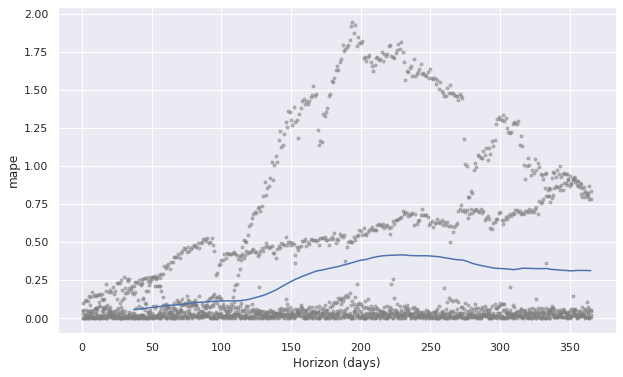

In [32]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

<div class='alert alert-info'>
    <h3><center>MAPE</center></h3>
    <p>The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error</p>
    <p>Many organizations focus primarily on the MAPE when assessing forecast accuracy. Most people are comfortable thinking in percentage terms, making the MAPE easy to interpret. It can also convey information when you don’t know the item’s demand volume. For example, telling your manager, "we were off by less than 4%" is more meaningful than saying "we were off by 3,000 cases," if your manager doesn’t know an item’s typical demand volume.<p>
    <img src="https://www.forecastpro.com/Trends/images/MAPE1.jpg" width='500'>
</div>

<div class='alert alert-warning'>
    <h3><center>What Prophet doesnt do</center></h3>
    <h4><b>1.Prophet does not allow non-Gaussian noise distribution:<b></h4> 
<p>In Prophet, noise distribution is always Gaussian and pre-transformation of y values is the only way to handle the values following skewed distribution.</p>
        <h4><b>2. Prophet does not take autocorrelation on residual into account</b></h4>
<p>Since epsilon noise portion in the formula assume i.i.d. normal distribution, the residual is not assumed to have autocorrelation, unlike ARIMA model.</p>
        <h4><b>3. Prophet does not assume stochastic trend</b></h4>
<p>Prophet’s trend component is always deterministic+possible changepoints and it won’t assume stochastic trend unlike ARIMA.</p>
</div>

<div class='alert alert-info'>
    <h3> <center>Interesting factor</center> </h3>
</div>

<div class='alert alert-warning'>
    <h3><center> <b>Tweet by Mark cuban On 14th April 2021</b>, American billionaire entrepreneur,owner of the National Basketball Association's (NBA) Dallas Mavericks<center></h3>
<br><h4>FYI, the Mavs sales in @dogecoin have increased 550pct over the past month. We have now sold more than 122k Doge in merchandise ! We will never sell 1 single Doge ever. So keep buying</h4> 
</div>

![](https://images.news18.com/ibnlive/uploads/2021/04/1618473964_untitled-design-3.jpg?impolicy=website&width=534&height=356)    

<div class='alert alert-info'>
    <h3> Yea the name is Elon musk, His single tweet about Dogecoin on Apr 15, 2021, which said <b>Doge barking at the Moon</b> received around 20.8k comments, 52.3k re-tweets, and 314.1K likes</h3>
    

In [33]:
data[(data['Date'].dt.year==2021)&(data['month']==4)&(data['Date'].dt.day>=13)&(data['Date'].dt.day<17)]

,Date,Open,High,Low,Close,Volume,month
1251,2021-04-13,0.070678,0.095181,0.070678,0.093445,7176815090,4
1252,2021-04-14,0.094256,0.142510,0.092452,0.121517,20977679327,4
1253,2021-04-15,0.121167,0.187326,0.120736,0.182207,17916620386,4
1254,2021-04-16,0.181587,0.437700,0.180488,0.365870,69410680685,4


In [34]:
###Just look at the numbers!
    
# On 13th april 1 dogecoin was trading at 0.09$
# On 14th april 1 dogecoin went upto to a high price of 0.14$(Mark cuban tweets about doge)
# On 15th april 1 dogecoin went upto to a high price of 0.18$(Elon musk tweets about doge)
# On 16th april 1 dogecoin ended with an all time high of 0.43$, yea that's true😱😱😱


#As of 11:10 a.m. Friday(16th april), the value of Dogecoin had jumped 203% 
#in just the past 24 hours to 0.404(USD), according to Coinbase,
#giving the cryptocurrency a market cap value of $52.2 billion.

#Over the past week, Dogecoin’s value has more than quintupled in value.

#Dogecoin was the seventh largest cryptocurrency in terms of market cap



In [35]:
#If you think the above numbers were suprising then you are wrong.
#Things changed pretty quick once elon musk posted this tweet 
#and multiple companies accpeting doge as a payment method

![](https://www.thesun.co.uk/wp-content/uploads/2021/04/doge.png)

In [36]:
data[(data['Date'].dt.year==2021)&(data['month']==4)&(data['Date'].dt.day>=26)&(data['Date'].dt.day<30)]

,Date,Open,High,Low,Close,Volume,month
1264,2021-04-26,0.251240,0.280452,0.248026,0.270674,5118886527,4
1265,2021-04-27,0.271427,0.279629,0.264928,0.272188,3590611310,4
1266,2021-04-28,0.272273,0.344662,0.256231,0.323682,14464343767,4
1267,2021-04-29,0.323232,0.323881,0.296904,0.305169,5027354503,4


<div class='alert alert-info'>
<h4>1. You could see that the tweet by elon musk saying that he is gonna be a part of the Saturday day night live(May 8) titled THE DOGEFATHER at CNBC with miley cyrus took the dogecoin price to new heights of 0.344$</h4>

<h4>2. Speculation about a possible cryptocurrency sketch pushed Doge past the $0.50 mark for the first time. It peaked at 0.66 on May 5.</h4>

<h4>3. Dogecoin rose 140%, from 0.2747 on April 27 to 0.6618 on May 5.</h4>
</div>

In [37]:
data[(data['Date'].dt.year==2021)&(data['month']==5)&(data['Date'].dt.day>=1)&(data['Date'].dt.day<7)]

,Date,Open,High,Low,Close,Volume,month
1269,2021-05-01,0.337559,0.397135,0.328290,0.392987,10123343703,5
1270,2021-05-02,0.391087,0.400029,0.364874,0.376046,8040406918,5
1271,2021-05-03,0.373631,0.445567,0.373631,0.441707,10526649978,5
1272,2021-05-04,0.440274,0.605998,0.400800,0.541334,38238126181,5
1273,2021-05-05,0.537355,0.695262,0.523822,0.657633,42525098292,5
1274,2021-05-06,0.652842,0.663616,0.545102,0.580804,18989900291,5


<div class='alert alert-info'>
<h4>In the past one week Dogecoin closing price on 1st May was around 0.39USD and it significantly increased to 0.58 USD on May 6th.</h3>

<h4> 1. People are buying heavily to make sure that they hold dogecoin before the SNL on MAY 8</h3>
<h4> 2. Huge volatility has been observed, where we can see certain amount of whales playing a bear game</h3>
</div>

<div class='alert alert-info'>
<h3>But to be honest, it not always PROFIT PROFIT PROFIT in any financial assets especially crypto</h3>

<h3>People were expecting a huge rise in Dogecoin Price after the SNL live, which was hosted by Elon Musk and miley cyrus</h3>

<h3> But the results were completely opposite</h3>
<p>Dogecoin fell as much as 29.5%, dropping to 49 cents, during Elon Musk’s SNL debut.</p>
<p> Reason: There was a huge whale activity playing a bear game, who dumps(sells) the large portion of his doge creating a huge supply and less demand therefore reducing the price of the dogecoin significantly</p>
    <p> There might be other possible reasons, pls let them know in the comments section</p>
</div>

<div class ='alert alert-warning'>
    <h2><center> DO YOU THINK DOGE WILL REACH THE MOON?📈🐕🌚🚀🚀🚀🚀🚀<center></h2>
    <h4>Let me know in the comments section and stay tuned for more updates</h4>
 </div>

<a id="7"></a>
## References 

1. [Time series prediction using Prophet in Python by Renu Khandelwal](https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236)
2. [Facebook Prophet by Moto DEI](https://medium.com/swlh/facebook-prophet-426421f7e331)
3. [Housing pices EDA and Prediction by Ruchi Bhatia](https://www.kaggle.com/ruchi798/housing-prices-eda-and-prediction)
4. [88.9 r2_score with pycaret by Kerem Yucedag](https://www.kaggle.com/keremyceda/88-9-r2-score-with-pycaret)

## [Credits to Dhruvil Dave for the dataset](https://www.kaggle.com/dhruvildave/dogecoin-historical-data)

<a id="8"></a>
## Related works

Below are some of my other cryptocurrency related datasets and notebooks. Do let me know your thoughts. Thank you!

### Notebooks:
1. [₿ Bitcoin Prices : EDA and Prediction (R2~0.99)](https://www.kaggle.com/kaushiksuresh147/bitcoin-prices-eda-and-prediction-r2-0-99)
2. [Ethereum EDA and Prediction using Prophet](https://www.kaggle.com/kaushiksuresh147/ethereum-eda-and-prediction-using-prophet)
3. [People's reaction on India's proposed crypto ban](https://www.kaggle.com/kaushiksuresh147/people-s-reaction-on-india-s-proposed-crypto-ban)


### Datasets:
1. [Ethereum Cryptocurrency Historical Dataset](https://www.kaggle.com/kaushiksuresh147/ethereum-cryptocurrency-historical-dataset)
2. [Matic(Polygon) Cryptocurrency Historical Dataset](https://www.kaggle.com/kaushiksuresh147/maticpolygon-crytocurrency-historical-dataset)
3. [Bitcoin Tweets](https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets)
4. [#IndiaWantsCrypto tweets](https://www.kaggle.com/kaushiksuresh147/india-wants-crypto-tweets)
